In [1]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
client = Socrata('data.cityofnewyork.us',
                 'BKagDL8jmsAK9QhB9PoS22K05',
                 username="dlm6693@gmail.com",
                 password="*Verboten1*")

In [8]:
_2017 = client.get("biws-g3hs", limit=250000)
df_2017 = pd.DataFrame.from_records(_2017)

In [9]:
df_2017.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid
0,186,1,16,0.3,0.5,2,1,239,1,N,1.78,0,19.58,2017-10-25T19:58:51.000,2017-10-25T19:34:40.000,2.80,1
1,229,1,29,0.3,0.5,6,1,138,1,N,7.31,5.76,43.87,2017-10-25T20:11:23.000,2017-10-25T19:46:23.000,9.47,2
2,262,1,16,0.3,0.5,6,2,79,1,N,0,0,17.8,2017-10-25T20:19:36.000,2017-10-25T20:00:35.000,3.85,2
3,68,1,10,0.3,0.5,1,1,231,1,N,0,0,11.8,2017-10-25T19:29:16.000,2017-10-25T19:17:15.000,2.10,1
4,114,1,8.5,0.3,0.5,1,3,234,1,N,0,0,10.3,2017-10-25T19:50:09.000,2017-10-25T19:38:51.000,1.40,1


In [10]:
_2016 = client.get("uacg-pexx", limit=250000)
df_2016 = pd.DataFrame.from_records(_2016)

In [11]:
df_2016.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid
0,236,0,5.5,0.3,0.5,1,1,236,1,N,1,0,7.3,2016-12-07T08:27:04.000,2016-12-07T08:20:18.000,0.5,2
1,79,0,8,0.3,0.5,1,1,234,1,N,2.2,0,11,2016-12-30T11:15:15.000,2016-12-30T11:05:37.000,1.31,2
2,68,0,5,0.3,0.5,1,2,90,1,N,0,0,5.8,2016-10-23T19:53:29.000,2016-10-23T19:49:53.000,1.02,2
3,107,0,5,0.3,0.5,4,1,164,1,N,1.16,0,6.96,2016-11-30T11:17:40.000,2016-11-30T11:12:56.000,0.76,2
4,234,0,7.5,0.3,0.5,1,1,186,1,N,1.66,0,9.96,2016-08-25T12:14:40.000,2016-08-25T12:05:19.000,0.94,2


In [12]:
data = pd.concat([df_2016,df_2017])

In [13]:
len(data)

500000

In [14]:
data = data.apply(pd.to_numeric, errors='ignore')

In [15]:
data = data.query('tip_amount!=0')

In [16]:
data = data.reset_index(drop=True)
data.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid
0,236,0.0,5.5,0.3,0.5,1,1,236,1,N,1.00,0.0,7.30,2016-12-07T08:27:04.000,2016-12-07T08:20:18.000,0.50,2
1,79,0.0,8.0,0.3,0.5,1,1,234,1,N,2.20,0.0,11.00,2016-12-30T11:15:15.000,2016-12-30T11:05:37.000,1.31,2
2,107,0.0,5.0,0.3,0.5,4,1,164,1,N,1.16,0.0,6.96,2016-11-30T11:17:40.000,2016-11-30T11:12:56.000,0.76,2
3,234,0.0,7.5,0.3,0.5,1,1,186,1,N,1.66,0.0,9.96,2016-08-25T12:14:40.000,2016-08-25T12:05:19.000,0.94,2
4,170,0.0,13.0,0.3,0.5,3,1,90,1,N,2.75,0.0,16.55,2016-11-28T15:46:18.000,2016-11-28T15:25:59.000,1.30,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327089 entries, 0 to 327088
Data columns (total 17 columns):
dolocationid             327089 non-null int64
extra                    327089 non-null float64
fare_amount              327089 non-null float64
improvement_surcharge    327089 non-null float64
mta_tax                  327089 non-null float64
passenger_count          327089 non-null int64
payment_type             327089 non-null int64
pulocationid             327089 non-null int64
ratecodeid               327089 non-null int64
store_and_fwd_flag       327089 non-null object
tip_amount               327089 non-null float64
tolls_amount             327089 non-null float64
total_amount             327089 non-null float64
tpep_dropoff_datetime    327089 non-null object
tpep_pickup_datetime     327089 non-null object
trip_distance            327089 non-null float64
vendorid                 327089 non-null int64
dtypes: float64(8), int64(6), object(3)
memory usage: 42.4+ MB


In [18]:
data = data.rename(columns={'tpep_dropoff_datetime':'dropoff_datetime', 'tpep_pickup_datetime':'pickup_datetime'})

In [19]:
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)

In [20]:
data['trip_time'] = (data.dropoff_datetime - data.pickup_datetime).dt.total_seconds()/60

In [21]:
pd.set_option('display.max_columns', 50)
data.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,dropoff_datetime,pickup_datetime,trip_distance,vendorid,trip_time
0,236,0.0,5.5,0.3,0.5,1,1,236,1,N,1.00,0.0,7.30,2016-12-07 08:27:04,2016-12-07 08:20:18,0.50,2,6.766667
1,79,0.0,8.0,0.3,0.5,1,1,234,1,N,2.20,0.0,11.00,2016-12-30 11:15:15,2016-12-30 11:05:37,1.31,2,9.633333
2,107,0.0,5.0,0.3,0.5,4,1,164,1,N,1.16,0.0,6.96,2016-11-30 11:17:40,2016-11-30 11:12:56,0.76,2,4.733333
3,234,0.0,7.5,0.3,0.5,1,1,186,1,N,1.66,0.0,9.96,2016-08-25 12:14:40,2016-08-25 12:05:19,0.94,2,9.350000
4,170,0.0,13.0,0.3,0.5,3,1,90,1,N,2.75,0.0,16.55,2016-11-28 15:46:18,2016-11-28 15:25:59,1.30,1,20.316667


In [22]:
data.trip_distance[0]/(data.trip_time[0]/60)

4.433497536945812

In [23]:
data['trip_speed'] = data.trip_distance/(data.trip_time/60)

In [24]:
data['subtotal'] = data.fare_amount+data.improvement_surcharge+data.mta_tax+data.extra

In [25]:
data['tip_percentage'] = data.tip_amount/data.subtotal

In [26]:
max(data.tip_amount)

600.0

In [27]:
data[data.tip_amount == 600]

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,dropoff_datetime,pickup_datetime,trip_distance,vendorid,trip_time,trip_speed,subtotal,tip_percentage
120271,48,0.0,0.01,0.3,0.0,2,1,48,5,N,600.0,0.0,600.31,2016-10-24 03:10:55,2016-10-24 03:10:41,0.0,1,0.233333,0.0,0.31,1935.483871


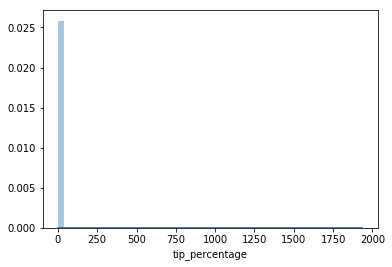

In [28]:
sns.distplot(data.tip_percentage)

In [29]:
len(data)

327089

In [30]:
data = data[data.tip_percentage <= .4]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325007 entries, 0 to 327088
Data columns (total 21 columns):
dolocationid             325007 non-null int64
extra                    325007 non-null float64
fare_amount              325007 non-null float64
improvement_surcharge    325007 non-null float64
mta_tax                  325007 non-null float64
passenger_count          325007 non-null int64
payment_type             325007 non-null int64
pulocationid             325007 non-null int64
ratecodeid               325007 non-null int64
store_and_fwd_flag       325007 non-null object
tip_amount               325007 non-null float64
tolls_amount             325007 non-null float64
total_amount             325007 non-null float64
dropoff_datetime         325007 non-null datetime64[ns]
pickup_datetime          325007 non-null datetime64[ns]
trip_distance            325007 non-null float64
vendorid                 325007 non-null int64
trip_time                325007 non-null float64
trip_s

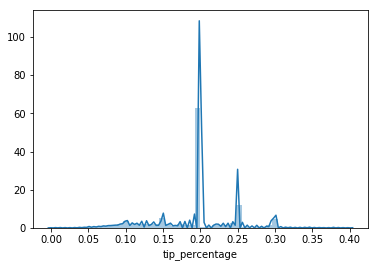

In [32]:
sns.distplot(data.tip_percentage)

In [33]:
data = data[data.trip_speed.notnull()]

In [34]:
data = data[data.trip_speed != np.inf]

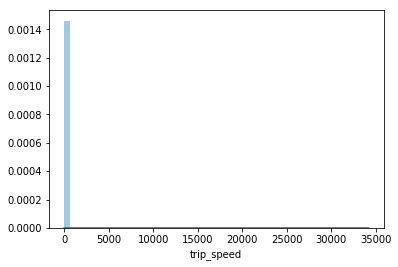

In [35]:
sns.distplot(data.trip_speed)

In [36]:
max(data.trip_speed)

34200.0

In [37]:
data[data.trip_speed > 34000]

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,dropoff_datetime,pickup_datetime,trip_distance,vendorid,trip_time,trip_speed,subtotal,tip_percentage
85918,265,4.5,52.0,0.3,0.5,1,1,265,2,N,14.3,0.0,71.6,2016-09-08 19:14:12,2016-09-08 19:14:11,9.5,1,0.016667,34200.0,57.3,0.249564


In [38]:
data = data[data.trip_distance != 0]

In [39]:
data = data.query('trip_time>1')

In [40]:
data[data.trip_speed > 100]

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,dropoff_datetime,pickup_datetime,trip_distance,vendorid,trip_time,trip_speed,subtotal,tip_percentage
23881,106,0.0,20.0,0.3,0.0,1,1,106,5,N,4.05,0.00,24.35,2016-11-12 06:14:20,2016-11-12 06:13:19,4.20,1,1.016667,247.868852,20.3,0.199507
154760,233,0.5,6.0,0.3,0.5,1,1,137,1,N,1.00,0.00,8.30,2016-08-14 01:16:24,2016-08-14 01:12:47,6.60,1,3.616667,109.493088,7.3,0.136986
231648,75,0.0,29.0,0.3,0.0,1,1,43,5,N,5.85,0.00,35.15,2017-10-26 04:03:23,2017-10-26 04:01:14,13.70,1,2.150000,382.325581,29.3,0.199659
299133,25,0.0,3.0,0.3,0.5,1,1,25,1,N,0.57,0.00,4.37,2017-10-26 12:10:45,2017-10-26 12:08:59,9.70,1,1.766667,329.433962,3.8,0.150000
322029,264,0.0,52.0,0.3,0.5,1,1,264,2,N,13.20,0.00,66.00,2017-10-26 06:03:12,2017-10-26 06:00:04,15.09,2,3.133333,288.957447,52.8,0.250000
322682,145,0.0,6.0,0.3,0.0,1,1,145,5,N,1.25,0.00,7.55,2017-10-26 14:43:55,2017-10-26 14:42:52,6.60,1,1.050000,377.142857,6.3,0.198413
326411,132,0.0,52.0,0.3,0.5,1,1,162,2,N,11.71,5.76,70.27,2017-10-26 07:56:45,2017-10-26 07:50:00,21.12,2,6.750000,187.733333,52.8,0.221780


In [41]:
len(data.query('trip_time>2')), len(data)

(321395, 323846)

In [42]:
data = data.query('trip_time>2')

In [43]:
data = data[data.trip_speed < 100]

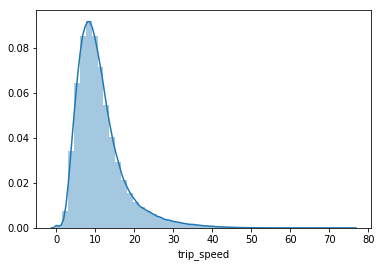

In [44]:
sns.distplot(data.trip_speed)

In [45]:
data.query('trip_speed>50')

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,dropoff_datetime,pickup_datetime,trip_distance,vendorid,trip_time,trip_speed,subtotal,tip_percentage
6053,265,0.0,159.0,0.3,0.0,1,1,93,5,N,31.85,0.00,191.15,2016-07-19 00:52:09,2016-07-19 00:25:34,25.10,1,26.583333,56.652038,159.3,0.199937
7181,132,0.0,52.0,0.3,0.5,4,1,194,2,N,15.00,5.54,73.34,2016-11-06 04:33:37,2016-11-06 04:16:10,16.01,2,17.450000,55.048711,52.8,0.284091
21481,74,0.0,52.0,0.3,0.5,2,1,132,2,N,14.55,5.54,72.89,2016-12-02 01:37:31,2016-12-02 01:18:13,17.00,1,19.300000,52.849741,52.8,0.275568
29086,132,0.0,52.0,0.3,0.5,1,1,170,2,N,11.67,5.54,70.01,2016-07-02 06:18:32,2016-07-02 06:00:28,15.42,2,18.066667,51.210332,52.8,0.221023
39815,265,0.0,187.5,0.3,0.0,1,1,132,5,N,43.95,32.08,263.83,2016-07-10 07:34:58,2016-07-10 06:32:09,52.40,1,62.816667,50.050411,187.8,0.234026
41139,132,0.0,52.0,0.3,0.5,1,1,161,2,N,5.00,5.54,63.34,2016-10-11 04:14:58,2016-10-11 03:54:23,17.90,1,20.583333,52.178138,52.8,0.094697
44184,132,0.0,52.0,0.3,0.5,1,1,194,2,N,10.00,5.54,68.34,2016-07-22 08:14:53,2016-07-22 07:58:11,14.65,2,16.700000,52.634731,52.8,0.189394
57685,265,0.5,61.5,0.3,0.5,1,1,138,1,N,12.55,0.00,75.35,2016-12-20 23:48:49,2016-12-20 23:20:34,23.60,1,28.250000,50.123894,62.8,0.199841
58931,265,0.0,172.0,0.3,0.0,4,1,223,5,N,38.50,20.29,231.09,2016-10-02 23:57:48,2016-10-02 23:15:12,37.80,1,42.600000,53.239437,172.3,0.223447
59006,132,0.0,52.0,0.3,0.5,1,1,132,2,N,11.65,5.54,69.99,2016-10-30 10:24:32,2016-10-30 10:21:49,2.30,1,2.716667,50.797546,52.8,0.220644


In [46]:
max(data.trip_speed)

75.58441558441557

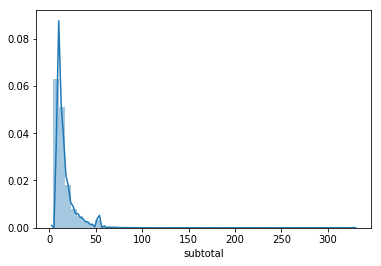

In [47]:
sns.distplot(data.subtotal)

In [48]:
data.drop(data.query('subtotal>100').query('trip_distance<3').index, inplace=True)

In [49]:
data['cost_per_minute'] = data.subtotal/data.trip_time

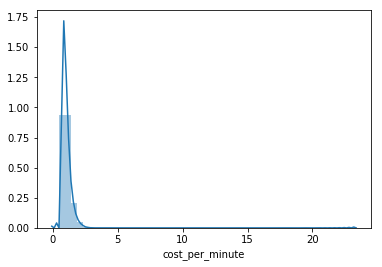

In [50]:
sns.distplot(data.cost_per_minute)

In [51]:
data.drop(data.query('cost_per_minute>3').index, inplace=True)

In [52]:
data.drop(data.query('cost_per_minute<0').index, inplace=True)

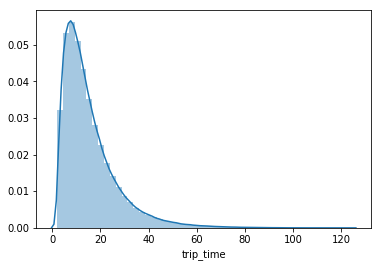

In [58]:
sns.distplot(data.trip_time)

In [54]:
data.drop(data.query('trip_time>200').index, inplace=True)

In [55]:
data.drop(data.query('trip_time>100').query('trip_distance<5').index, inplace=True)

In [56]:
data.drop(data.query('trip_time>125').index, inplace=True)

In [57]:
data.drop(data.query('cost_per_minute<.30').index, inplace=True)

In [59]:
data.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,dropoff_datetime,pickup_datetime,trip_distance,vendorid,trip_time,trip_speed,subtotal,tip_percentage,cost_per_minute
0,236,0.0,5.5,0.3,0.5,1,1,236,1,N,1.00,0.0,7.30,2016-12-07 08:27:04,2016-12-07 08:20:18,0.50,2,6.766667,4.433498,6.3,0.158730,0.931034
1,79,0.0,8.0,0.3,0.5,1,1,234,1,N,2.20,0.0,11.00,2016-12-30 11:15:15,2016-12-30 11:05:37,1.31,2,9.633333,8.159170,8.8,0.250000,0.913495
2,107,0.0,5.0,0.3,0.5,4,1,164,1,N,1.16,0.0,6.96,2016-11-30 11:17:40,2016-11-30 11:12:56,0.76,2,4.733333,9.633803,5.8,0.200000,1.225352
3,234,0.0,7.5,0.3,0.5,1,1,186,1,N,1.66,0.0,9.96,2016-08-25 12:14:40,2016-08-25 12:05:19,0.94,2,9.350000,6.032086,8.3,0.200000,0.887701
4,170,0.0,13.0,0.3,0.5,3,1,90,1,N,2.75,0.0,16.55,2016-11-28 15:46:18,2016-11-28 15:25:59,1.30,1,20.316667,3.839212,13.8,0.199275,0.679245


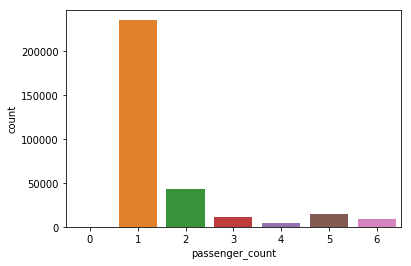

In [60]:
sns.countplot(data.passenger_count)

In [61]:
data.corr()>.75

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,tip_amount,tolls_amount,total_amount,trip_distance,vendorid,trip_time,trip_speed,subtotal,tip_percentage,cost_per_minute
dolocationid,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
extra,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fare_amount,False,False,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False
improvement_surcharge,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mta_tax,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
passenger_count,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
payment_type,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
pulocationid,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
ratecodeid,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
tip_amount,False,False,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False


In [62]:
data = data.reset_index(drop=True)
data.to_csv('taxi_data.csv')

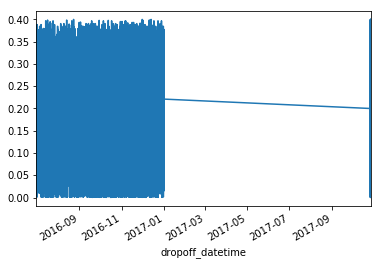

In [63]:
data.set_index('dropoff_datetime').tip_percentage.plot()

In [64]:
min(data.dropoff_datetime), max(data.dropoff_datetime)

(Timestamp('2016-07-01 00:07:30'), Timestamp('2017-10-27 00:29:37'))

In [69]:
data = data.set_index('dropoff_datetime')

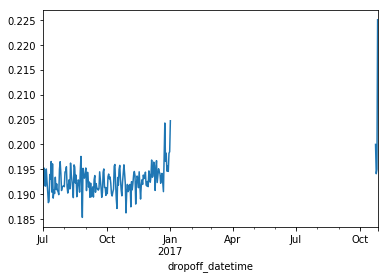

In [71]:
data.resample('D').tip_percentage.mean().plot()

In [72]:
data[(data.pickup_datetime > '2017-02-01') & (data.pickup_datetime<'2017-10-01')]

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,pickup_datetime,trip_distance,vendorid,trip_time,trip_speed,subtotal,tip_percentage,cost_per_minute
dropoff_datetime,,,,,,,,,,,,,,,,,,,,,


In [74]:
min(df_2017.tpep_pickup_datetime), max(df_2017.tpep_pickup_datetime)

('2017-10-24T23:35:00.000', '2017-10-26T23:52:45.000')